In [18]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

140


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,1c4a8ca33e73044c6a6a4e520fd0cef2fb2c8fe4,cronk-flab,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cot/format-thought.txt,cq.txt,semi/cot.json,...,154,84,62.369048,20.143928,31,45.0,59.0,73.0,112,COT
1,7e34c954c45becf4415489b84ed35dab266b891a,telic-yobs,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.0,ccot/format-thought.txt,cq.txt,semi/ccot.json,...,110,75,52.946667,18.611892,17,39.5,49.0,63.5,102,CCOT
2,812e468431fdd3a2ef56b8b86985a40e308ea8f0,massy-gray,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.7,cok/adapted.txt,cq.txt,semi/cok.json,...,159,73,97.150685,23.893671,55,79.0,97.0,110.0,169,COK
3,8e99664d63862ba9a83c01b718480c49b7bef7d0,score-wife,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,direct/format-few.txt,cq.txt,semi/direct.json,...,14,69,8.579710,11.605533,3,4.0,5.0,8.0,89,DIRECT
4,85a91ee74b2f73824442339b95747ad6cb4037dc,ample-jags,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cot/format-thought.txt,cq.txt,semi/cot.json,...,145,73,62.506849,21.579390,26,46.0,56.0,80.0,130,COT


In [20]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [21]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.n_sc",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,blame-dook,0.0,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,1,0.633333,0.736454,...,96,82,49.048780,15.696899,23,39.25,46.5,57.00,97,CCOT
1,mated-feme,0.0,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,2,0.650000,0.744380,...,85,78,50.974359,16.537226,23,40.00,49.0,60.00,99,CCOT
2,rindy-boot,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,2,0.633333,0.732861,...,81,83,50.421687,16.847320,23,38.50,47.0,61.00,99,CCOT
3,about-ossa,1.0,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,2,0.630000,0.748368,...,121,78,52.692308,19.916258,24,38.75,50.0,64.75,115,CCOT
4,jaggy-jynx,0.0,ccot/format-thought.txt,cq.txt,semi/ccot.json,1,1,1,0.636667,0.732997,...,90,80,49.387500,20.153521,5,37.00,46.5,60.50,100,CCOT


In [22]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [23]:
# make temperature 1 decimal
df["params.qa.temperature"] = df["params.qa.temperature"].round(1)

In [31]:
def parse_instruction(row):
    technique = row["params.qa.technique"].lower()
    sp = row["params.qa.system_prompt"].lower().replace(technique + "/", "")
    fs = row["params.qa.few_shot_examples"].lower().replace("/" + technique, "")
    return f"{technique}/{sp}/{fs}"

df["instruction"] = df.apply(parse_instruction, axis=1)

In [41]:
target_param_cols

['params.qa.technique',
 'params.qa.system_prompt',
 'params.qa.few_shot_examples',
 'params.qa.n_shot',
 'params.qa.n_sc',
 'params.qa.temperature']

In [42]:
avg_df = df.groupby(target_param_cols)[metric_cols].max().reset_index()
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
57,CTE,cte/format-triples-ere-few,semi/cte-triples,3,1,0.1,0.703333,0.794636,0.76,0.852036,...,52.00,92,62,51.177419,15.846108,27,39.00,49.0,61.5,100
38,COT,cot/format-thought,semi/cot,2,1,1.0,0.700000,0.787923,0.75,0.836024,...,73.75,127,66,66.166667,25.348393,24,48.50,64.5,75.5,170
24,COK,cok/adapted,semi/cok,2,1,1.0,0.690000,0.780655,0.74,0.839891,...,106.00,174,77,96.272727,26.021568,57,80.75,93.5,110.0,170
95,DIRECT,direct/format-few,semi/direct,3,1,0.1,0.673333,0.776472,0.72,0.833585,...,6.00,14,68,7.367647,6.996597,3,4.00,5.0,8.0,39
5,CCOT,ccot/format-thought,semi/ccot,2,1,0.5,0.663333,0.760960,0.71,0.805976,...,54.00,89,71,50.985915,18.009912,11,39.00,47.0,61.5,109


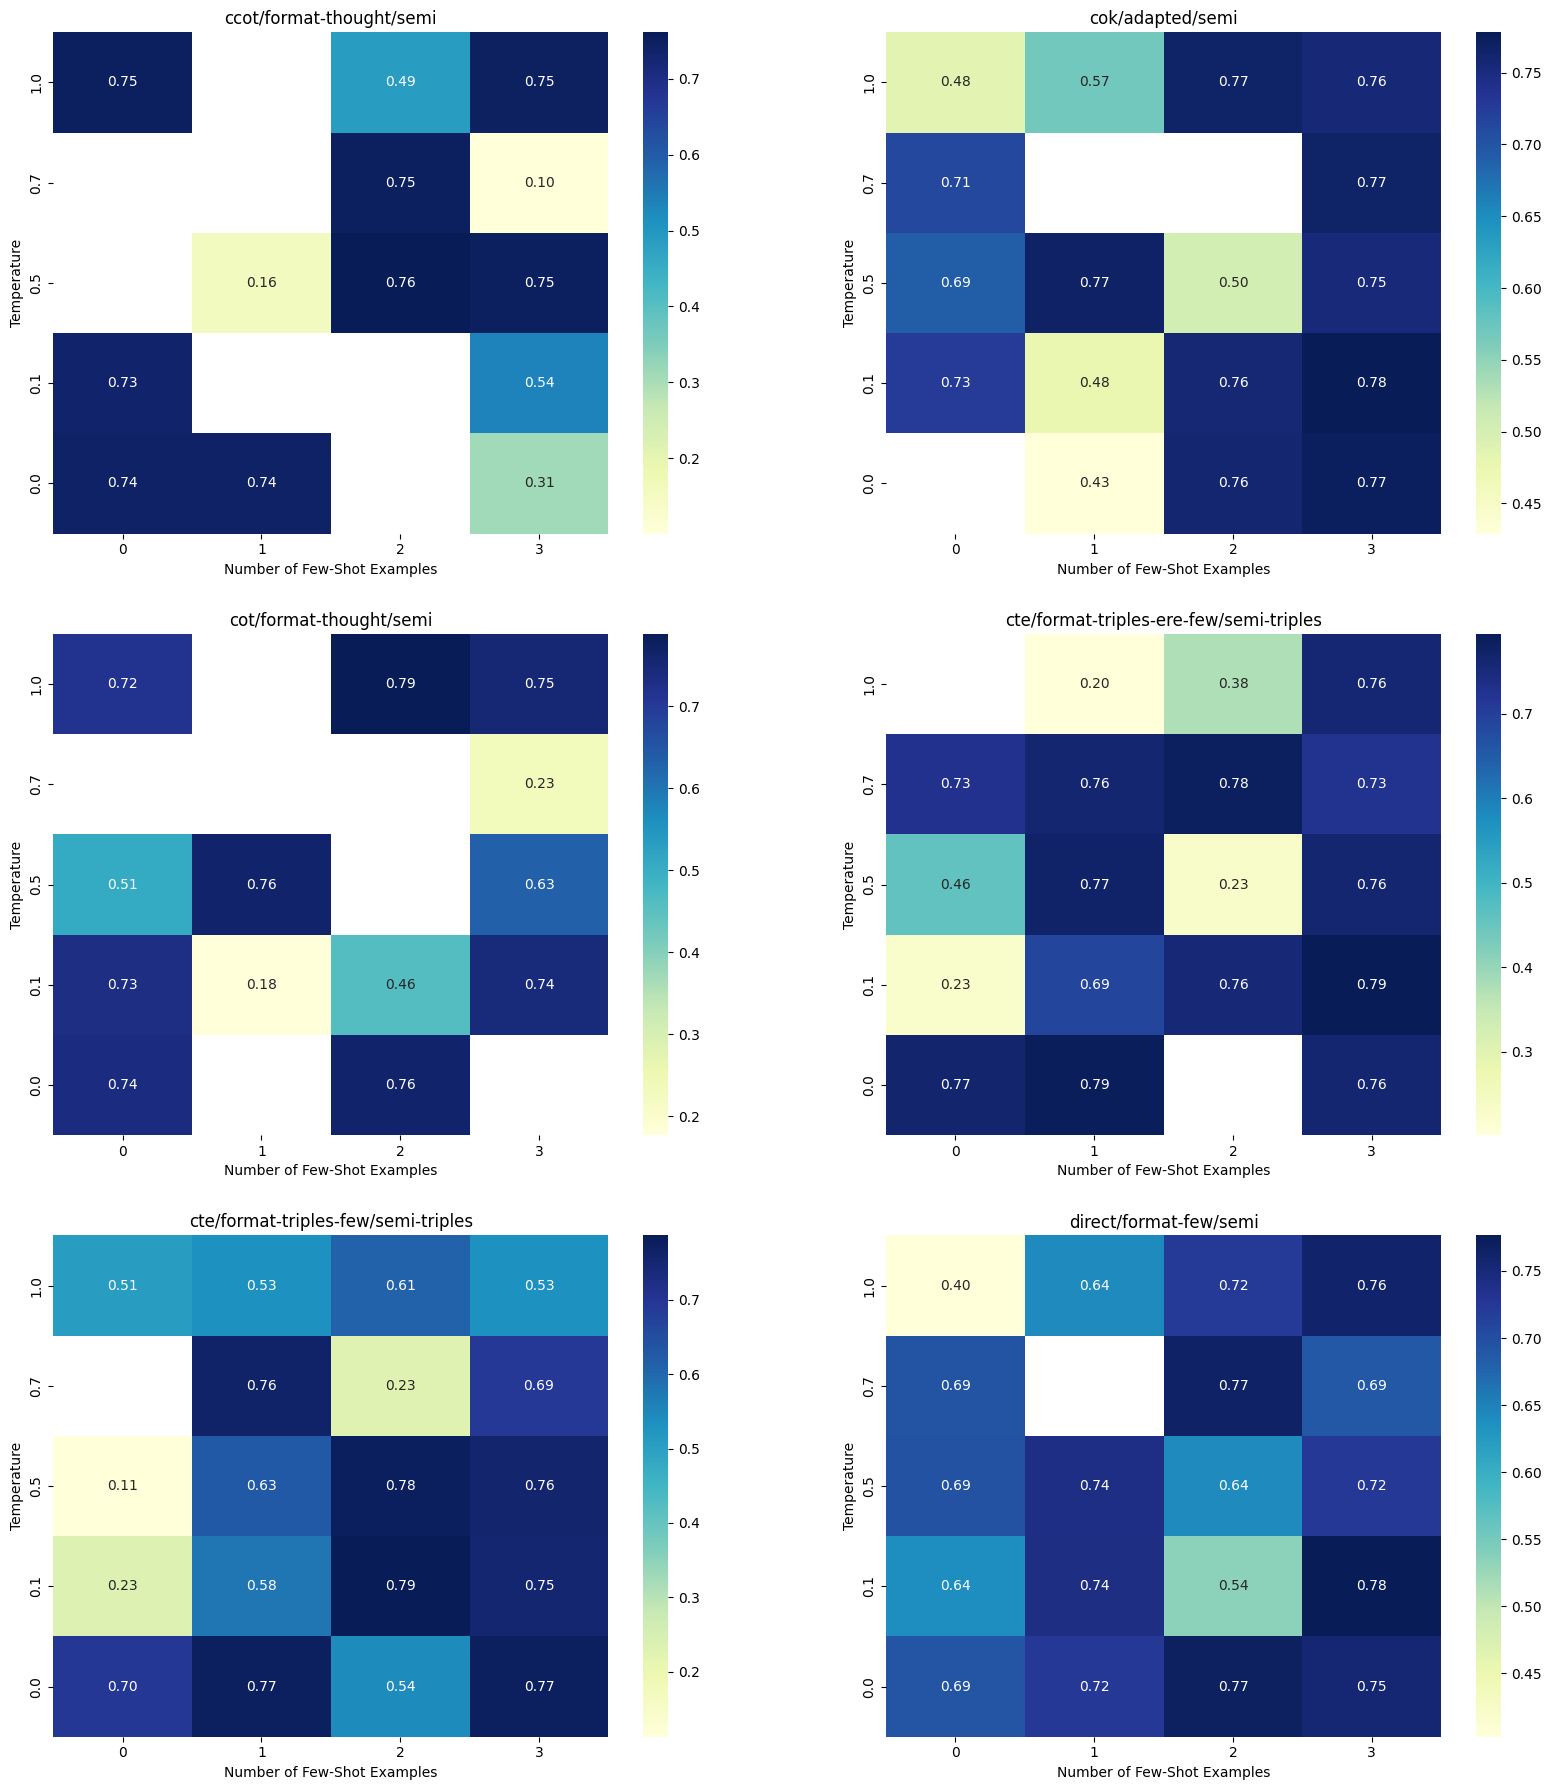

In [39]:
# Example 2: Heatmap of F1 scores based on temperature and number of few-shot examples per technique
instructions = df["instruction"].unique()
n = len(instructions)
n_cols = 2
n_rows = (n + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

for ax, instruction in zip(axes.flatten(), instructions):
    subset_df = df[df["instruction"] == instruction]
    pivot_table = subset_df.pivot_table(
        values="metrics.f1",
        index="params.qa.temperature",
        columns="params.qa.n_shot",
        aggfunc="mean",
    )
    sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".2f",
        cmap="YlGnBu",
        ax=ax,
        yticklabels=True,
    )
    ax.set_title(instruction)
    ax.set_xlabel("Number of Few-Shot Examples")
    ax.set_ylabel("Temperature")
    ax.invert_yaxis()

# Remove any empty subplots
for ax in axes.flatten()[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Add padding between plots
plt.show()


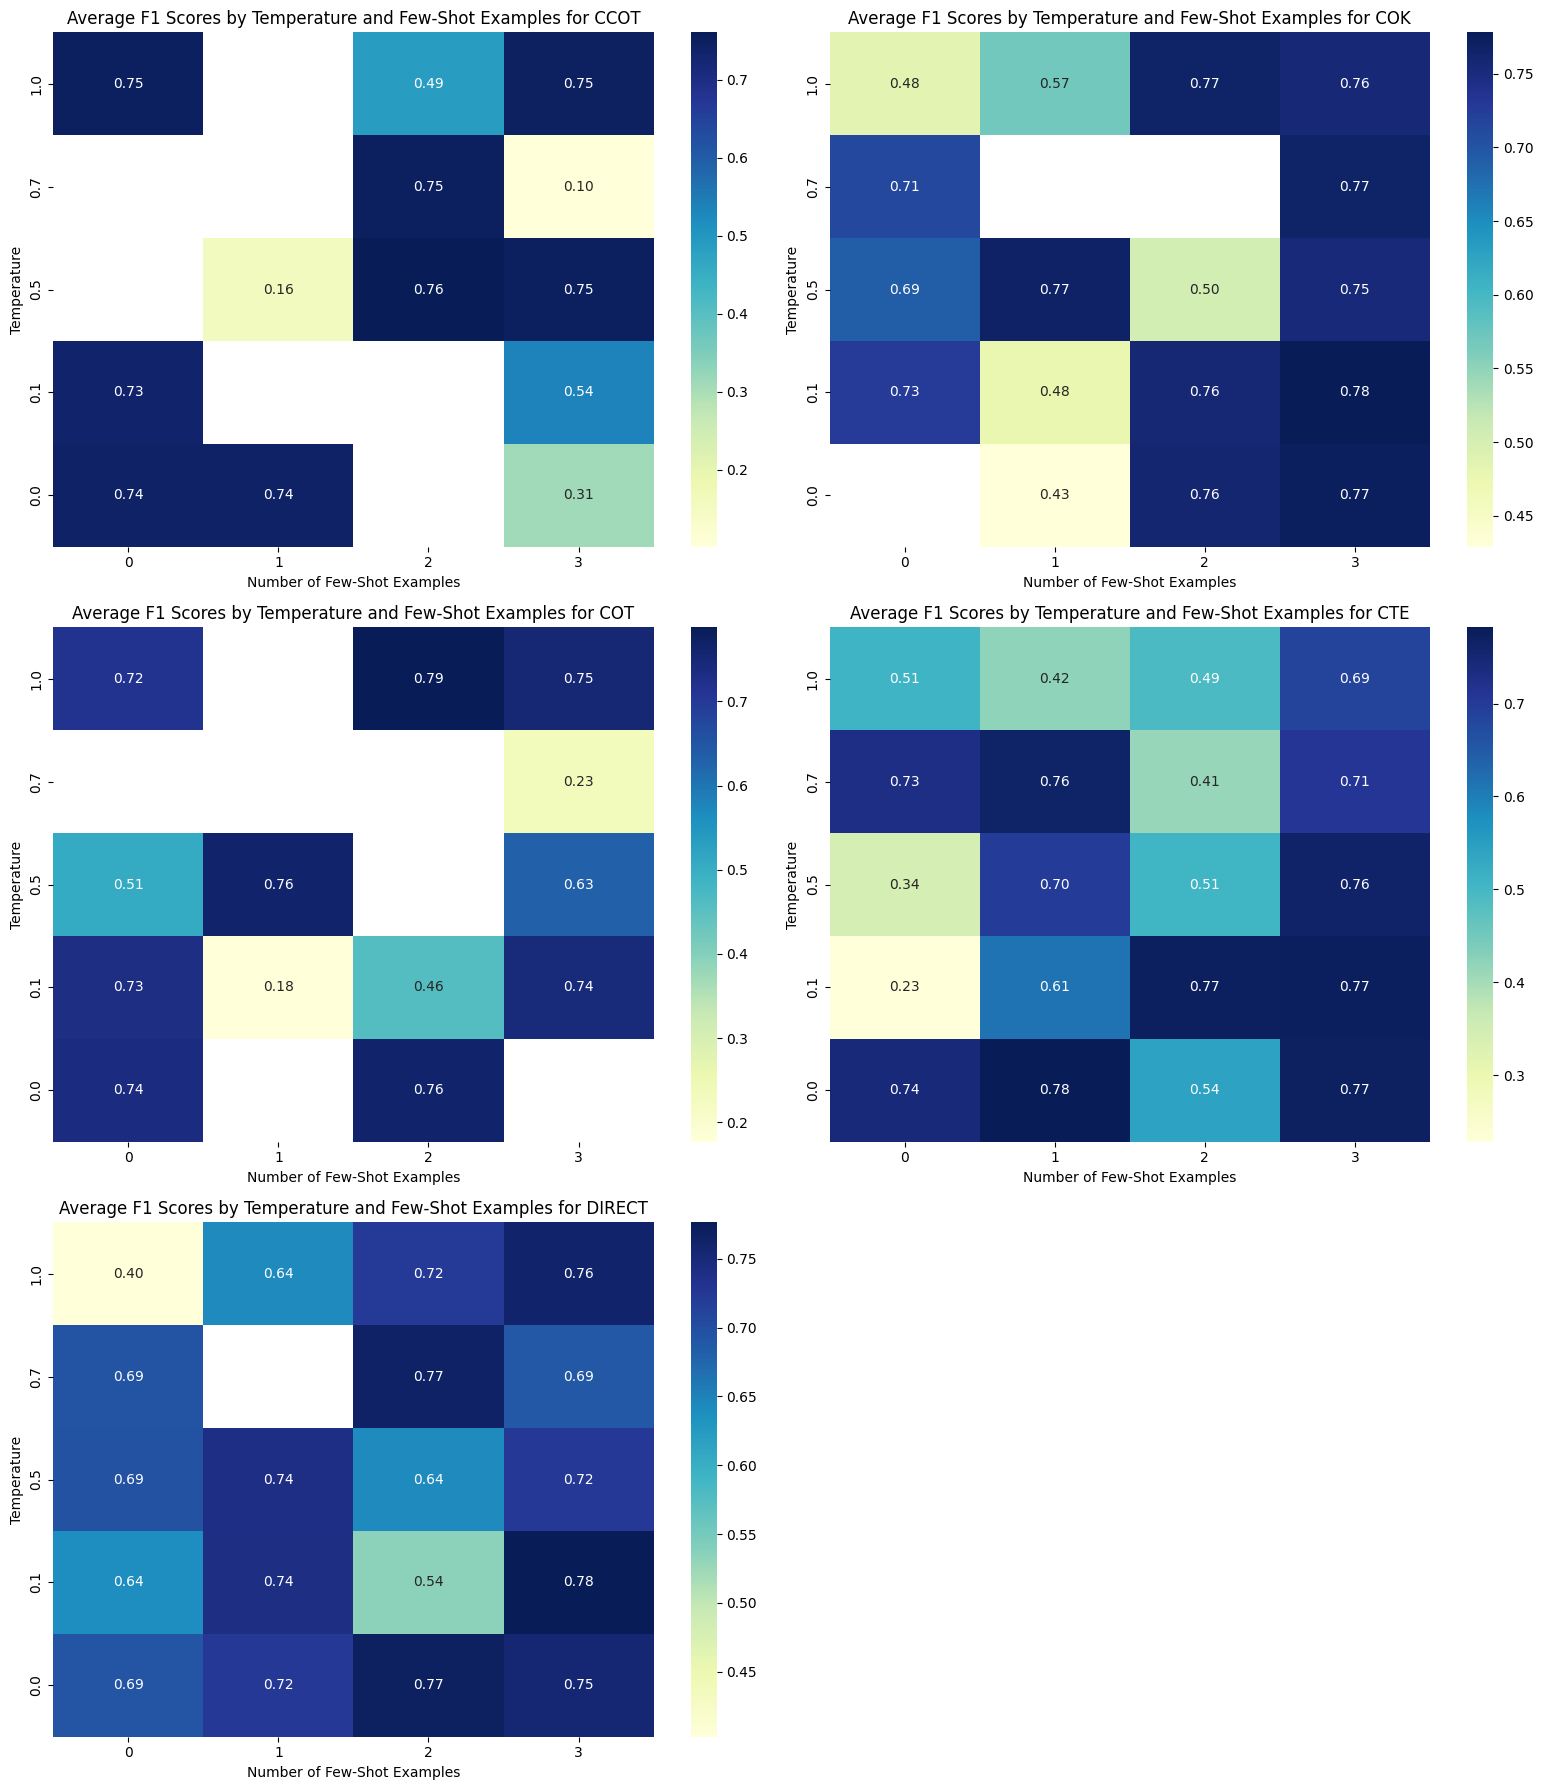

In [ ]:
# Example 2: Heatmap of F1 scores based on temperature and number of few-shot examples per technique
techniques = df["params.qa.technique"].unique()
n = len(techniques)
n_cols = 2
n_rows = (n + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

for ax, instruction in zip(axes.flatten(), techniques):
    subset_df = df[df["params.qa.technique"] == instruction]
    pivot_table = subset_df.pivot_table(
        values="metrics.f1",
        index="params.qa.temperature",
        columns="params.qa.n_shot",
        aggfunc="mean",
    )
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", ax=ax, yticklabels=True)
    ax.set_title(
        f"Average F1 Scores by Temperature and Few-Shot Examples for {instruction}"
    )
    ax.set_xlabel("Number of Few-Shot Examples")
    ax.set_ylabel("Temperature")
    ax.invert_yaxis()

# Remove any empty subplots
for ax in axes.flatten()[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


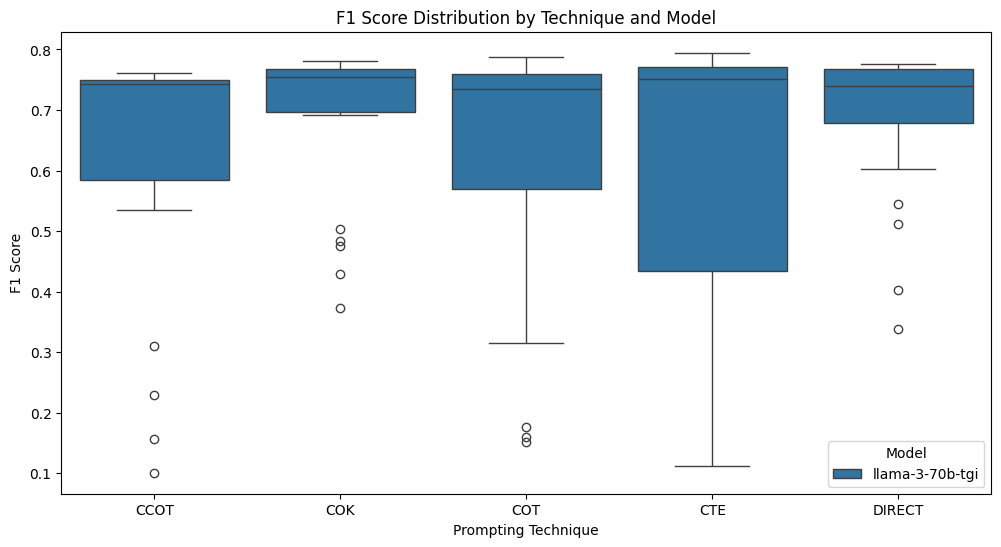

In [6]:
# Example 3: Boxplot to show variance across different techniques
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='params.qa.technique', y='metrics.f1', hue='params.qa.model')
plt.title('F1 Score Distribution by Technique and Model')
plt.xlabel('Prompting Technique')
plt.ylabel('F1 Score')
plt.legend(title='Model')
plt.show()
